In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de Dados


### Titanic


In [3]:
data = pd.read_csv('titanic/train.csv')

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

In [9]:
data['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

### Matplotlib


In [11]:
%matplotlib inline

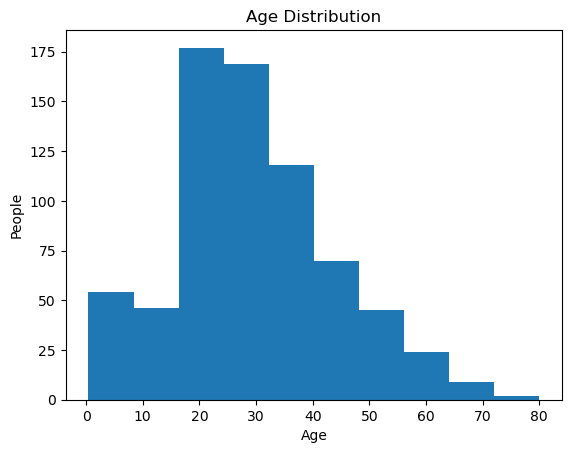

In [17]:
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')
plt.ylabel('People')
plt.xlabel('Age')
plt.show()

In [19]:
data['Pclass'].unique()

array([3, 1, 2])

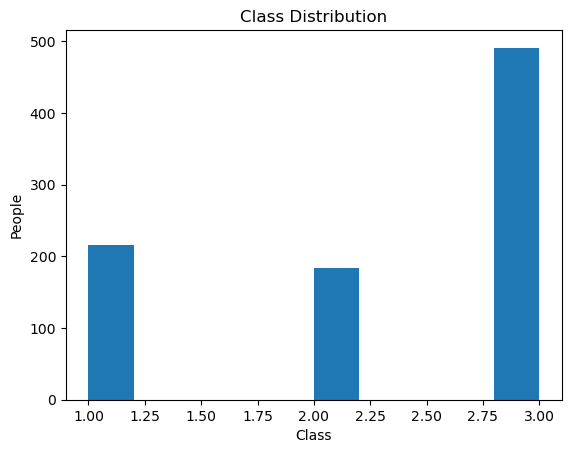

In [22]:
plt.hist(data['Pclass'])
plt.title('Class Distribution')
plt.ylabel('People')
plt.xlabel('Class')
plt.show()

### Subplots - 1ª Forma


<function matplotlib.pyplot.show(close=None, block=None)>

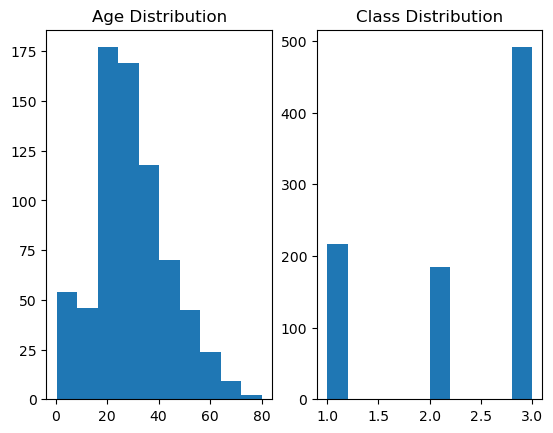

In [26]:
plt.subplot(1, 2, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.show

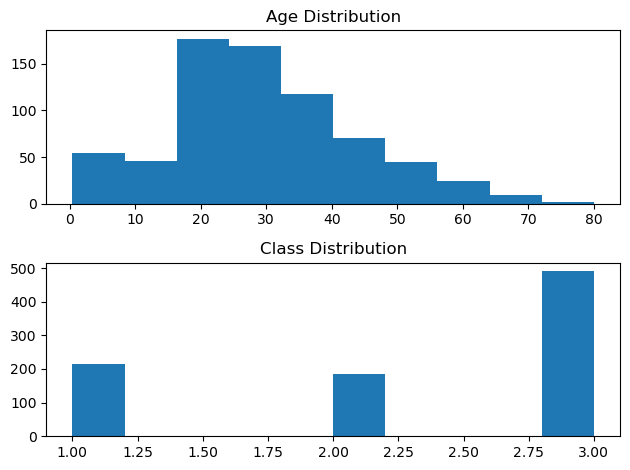

In [37]:
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

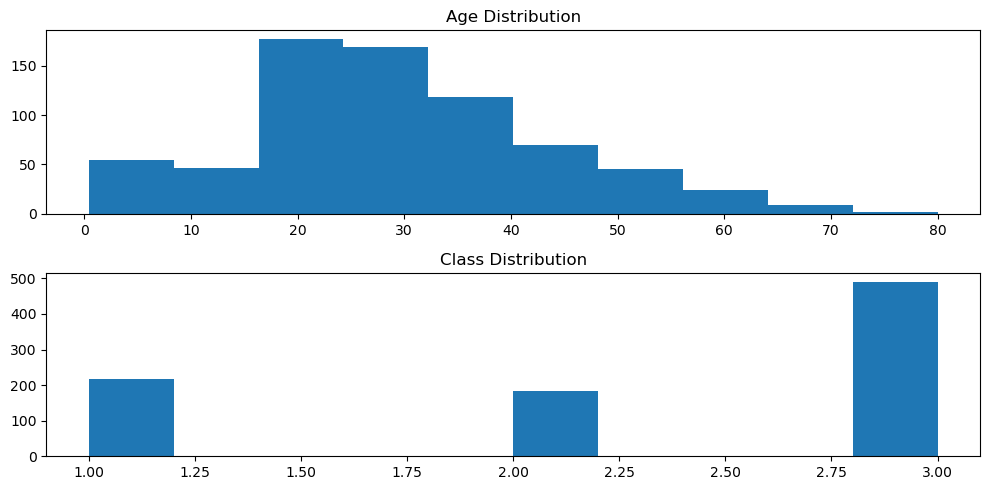

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

### Subplots - 2ª Forma


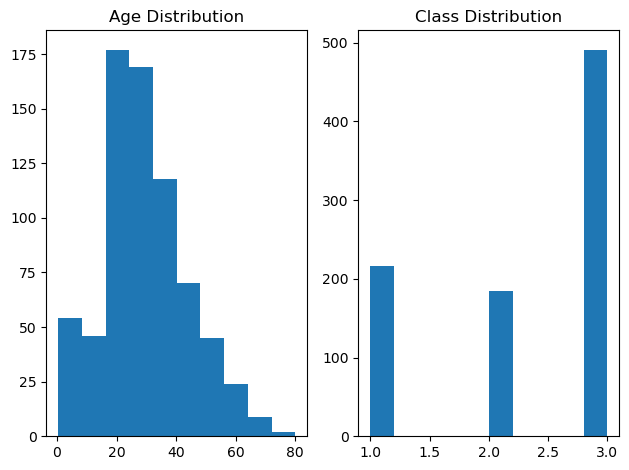

In [31]:
f, ax = plt.subplots(1, 2)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

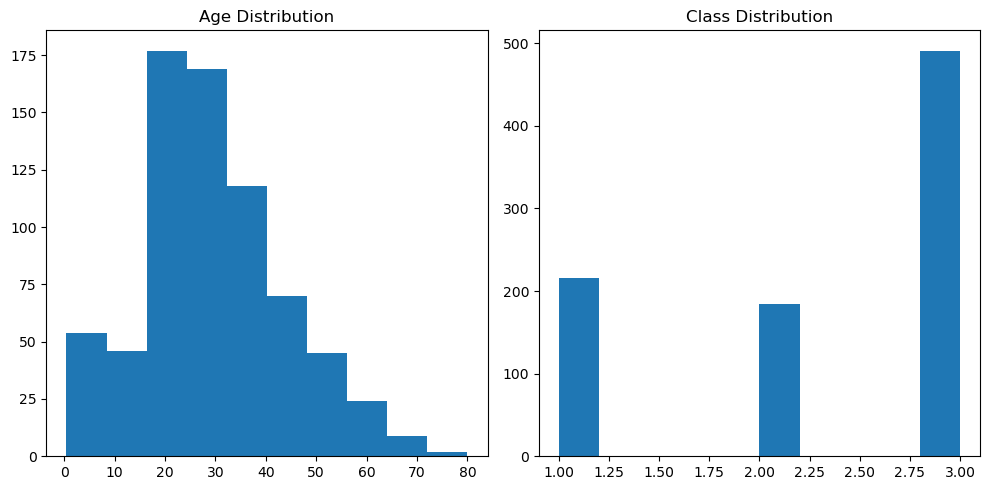

In [39]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

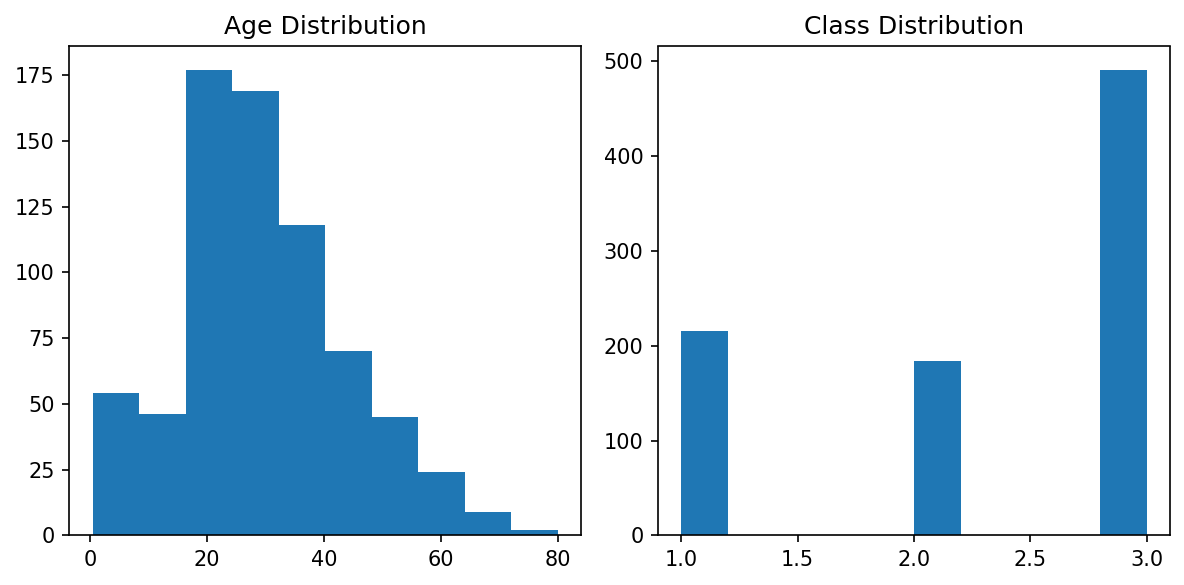

In [42]:
f, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

### Seaborn


In [46]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [47]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [48]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### pie e countplot


<Axes: xlabel='Sex', ylabel='count'>

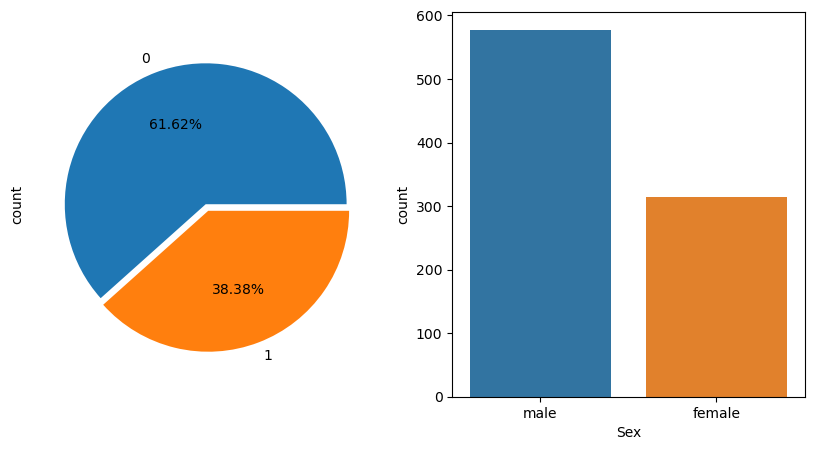

In [66]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Survived'].value_counts().plot.pie(
    ax=ax[0], explode=[0, 0.05], autopct='%0.2f%%')  # type:ignore

sns.countplot(data, x='Sex', ax=ax[1], hue='Sex')

### countplot e hue


### boxplot


### violinplot


### FacetGrid com hist


### FacetGrid com barplot


### FacetGrid com distplot


### catplot do tipo "point"


### FacetGrid com pointplot


### heatmap


### relplot


### scatterplot


### pairplot


### jointplot tipo "kde"


### jointplot tipo "reg"


### kdeplot


### catplot do tipo "count"


### heatmap corr()


### plot


### linspace


### normal


Fontes:

- https://matplotlib.org/gallery/index.html
- https://seaborn.pydata.org/examples/index.html
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
- https://matplotlib.org/tutorials/colors/colormaps.html
